In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

%matplotlib inline

c:\Users\ninja\.conda\envs\ml2\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [3]:
df = pd.read_csv('eval_results.csv')
print(df.columns)

Index(['file_name', 'model_name', 'Pattern-doubletap', 'compression_distance',
       'Pattern Density', 'time_diff', 'Pattern-stream', 'Pattern-Jump',
       'Pattern-backandfor', 'Pattern-trippletap', 'Pattern variations',
       'difficulty', 'PreviewTime', 'BeatDivisor', 'FormatVersion',
       'TimelineZoom', 'BeatmapID', 'DistanceSpacing', 'UseSkinSprites',
       'Title', 'AudioFilename', 'Version', 'WidescreenStoryboard', 'Mode',
       'StackLeniency', 'ApproachRate', 'SkinPreference', 'EpilepsyWarning',
       'StoryFireInFront', 'EditorBookmarks', 'EditorDistanceSpacing',
       'GridSize', 'Artist', 'SliderMultiplier', 'Source', 'CircleSize',
       'HPDrainRate', 'Bookmarks', 'BeatmapSetID', 'LetterboxInBreaks',
       'AudioLeadIn', 'SliderTickRate', 'OverallDifficulty', 'Tags',
       'ArtistUnicode', 'TitleUnicode', 'Countdown', 'SampleSet', 'Creator'],
      dtype='object')


In [4]:
df.columns[:12].values

array(['file_name', 'model_name', 'Pattern-doubletap',
       'compression_distance', 'Pattern Density', 'time_diff',
       'Pattern-stream', 'Pattern-Jump', 'Pattern-backandfor',
       'Pattern-trippletap', 'Pattern variations', 'difficulty'],
      dtype=object)

In [5]:
keep_columns = df.columns[:12].values
df = df[keep_columns]

In [6]:
df.head()

,file_name,model_name,Pattern-doubletap,compression_distance,Pattern Density,time_diff,Pattern-stream,Pattern-Jump,Pattern-backandfor,Pattern-trippletap,Pattern variations,difficulty
0,639.osu,random,0.0,0.940633,155.0,165.606607,0.0,142.0,13.0,0.0,2.0,"(4.579430115963884, 7.0)"
1,841.osu,random,0.0,0.924686,167.0,406.040892,0.0,158.0,9.0,0.0,2.0,"(5.234413575564213, 7.0)"
2,3189.osu,random,0.0,0.940577,104.0,169.011905,0.0,98.0,6.0,0.0,2.0,"(4.596970549783453, 2.0)"
3,3241.osu,random,0.0,0.910364,161.0,173.677596,0.0,153.0,8.0,0.0,2.0,"(4.506620002822629, 5.0)"
4,4053.osu,random,0.0,0.955527,146.0,172.871097,0.0,143.0,3.0,0.0,2.0,"(4.876300821181713, 9.0)"


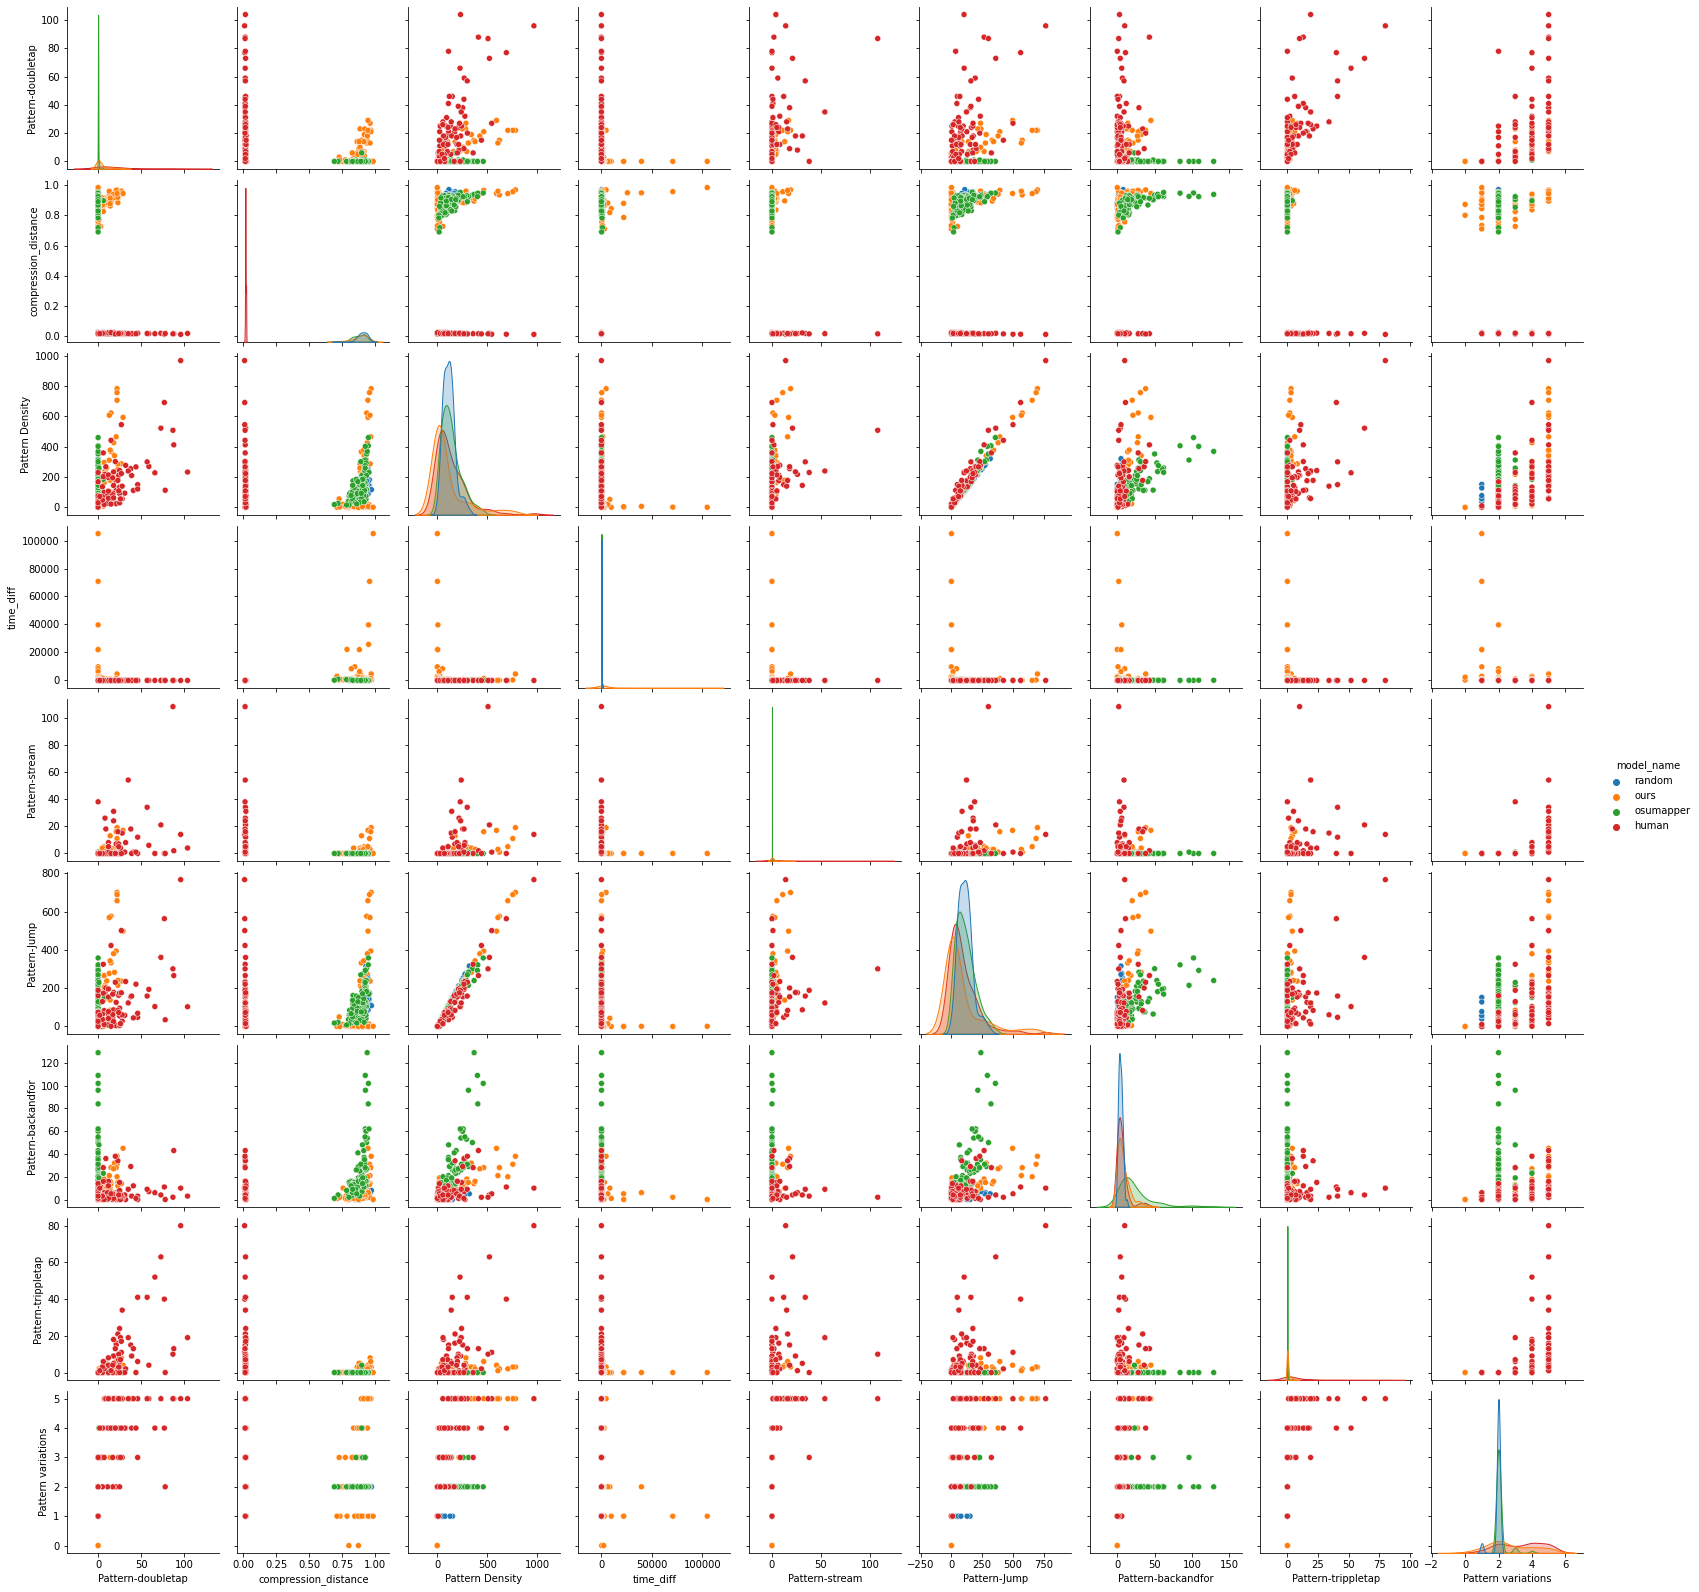

In [10]:
sns.pairplot(df, hue='model_name')

In [15]:
pattern_df = df[[x for x in df.columns if 'Pattern' in x]]
normed_pattern_df = pattern_df.apply(lambda x: x / x['Pattern Density'], axis=1)
normed_pattern_df['model_name'] = df['model_name']
sns.pairplot(normed_pattern_df, hue='model_name')

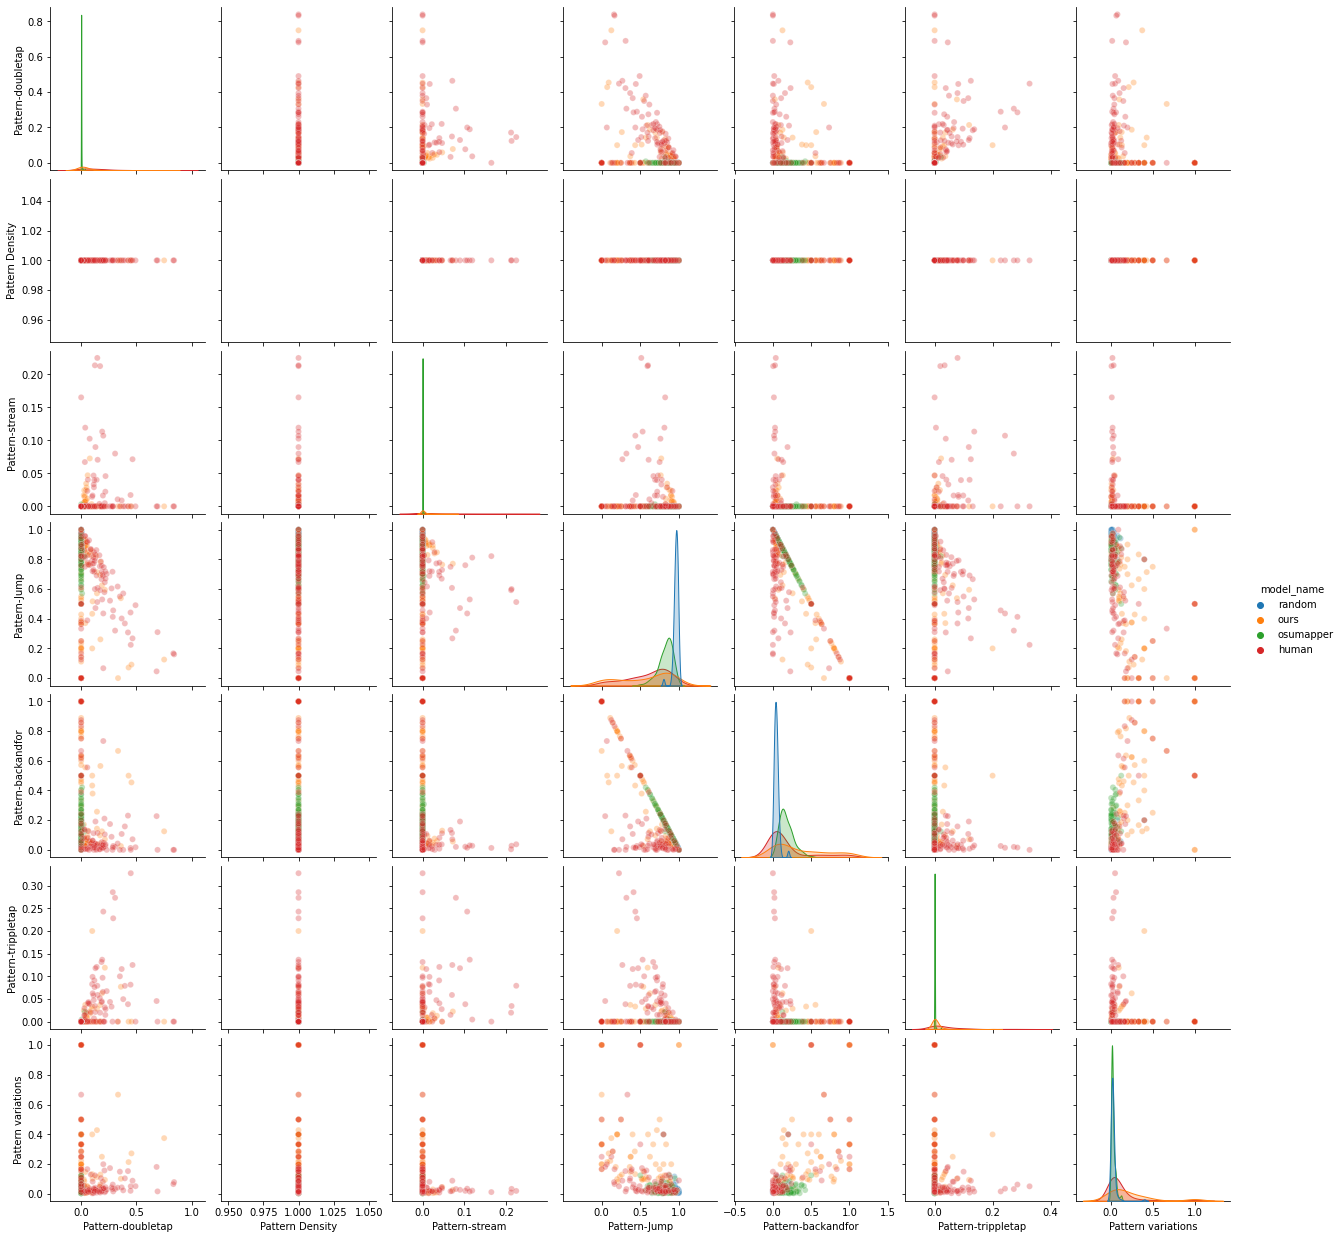

In [22]:
sns.pairplot(normed_pattern_df, hue='model_name', kind='scatter', plot_kws={'alpha': 0.3})

In [16]:
df['float_difficulty'] = df['difficulty'].apply(lambda x: eval(str(x))[0] if not np.isnan(x) else np.nan)

TypeError: ufunc 'isnan' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

<AxesSubplot:xlabel='Pattern variations', ylabel='Count'>

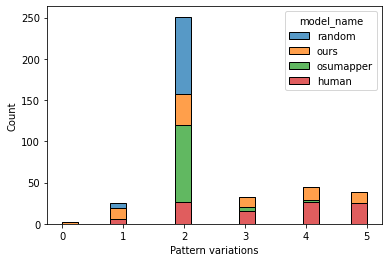

In [45]:
sns.histplot(df, x='Pattern variations', hue='model_name', multiple='stack')

<AxesSubplot:xlabel='Pattern variations', ylabel='model_name'>

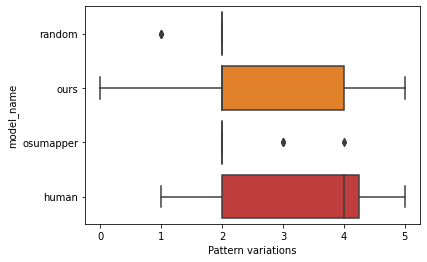

In [41]:
sns.boxplot(data=df, x='Pattern variations', y='model_name')

<AxesSubplot:xlabel='Pattern variations', ylabel='Density'>

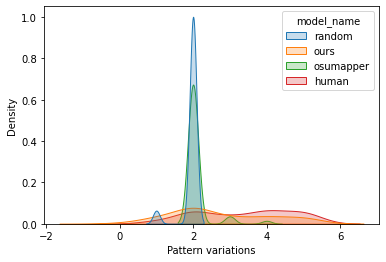

In [30]:
sns.kdeplot(data=df, x='Pattern variations', hue='model_name', shade=True)

In [54]:
for model_name in df['model_name'].unique():
  print(model_name)
  print(df[df['model_name'] == model_name]['time_diff'].describe())

random
count     100.000000
mean      248.277589
std       167.071039
min       148.744681
25%       166.219909
50%       174.429439
75%       243.077406
max      1202.472906
Name: time_diff, dtype: float64
ours
count       100.000000
mean       3751.684707
std       13537.889835
min          63.369928
25%         290.756700
50%         555.624676
75%         949.568210
max      104938.093883
Name: time_diff, dtype: float64
osumapper
count    100.000000
mean     172.372803
std      139.706870
min       45.857988
25%       91.310043
50%      126.578461
75%      187.659119
max      946.513514
Name: time_diff, dtype: float64
human
count    100.0
mean       0.0
std        0.0
min        0.0
25%        0.0
50%        0.0
75%        0.0
max        0.0
Name: time_diff, dtype: float64


Text(0.5, 1.0, 'Time difference between model and human')

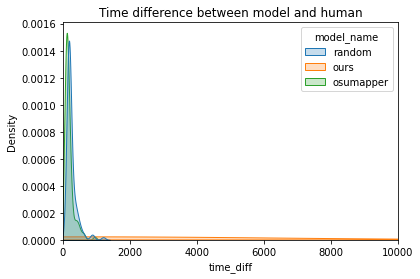

In [58]:
sns.kdeplot(data=df[df['model_name'] != 'human'], x='time_diff', hue='model_name', shade=True)
plt.xlim(0, 10000)
plt.title('Time difference between model and human')